# Image visualization

In this tutorial, we will see how to use `seaborn-image` to perform some basic descriptive 2-D image visualization. Throughout this tutorial, we will use `imgplot()`, an axes-level function. `imgplot()` provides a lot of functionalities to handle and display different kinds of images.

In addition to `imgplot()`, we will also use `load_image()` and `set_context()` functions.

In [1]:
%matplotlib inline
import seaborn_image as isns

isns.set_context("notebook")

C:\Users\sarth\Anaconda3\envs\seaborn-image-test\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The validate_legend_loc function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]


We will first take a look at a sample polymer image using the `imgplot()` function. 

No. of Obs. : 65536
Min. Value : -8.2457214
Max. Value : 43.714034999999996
Mean : 7.456410761947062
Variance : 92.02680396572863
Skewness : 0.47745180538933696


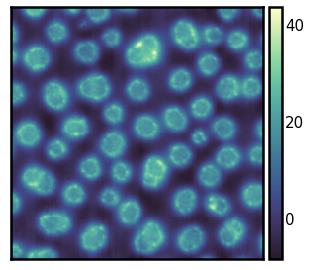

In [2]:
pol = isns.load_image("polymer")

ax = isns.imgplot(pol)

It does a few things by default other than simply plotting the image:
- Calculates and displays descriptive statistics for the given image. Under the hood, `imgplot()` uses `scipy.stats` to provide the statistics.
- Adds a colorbar by default
- Hides the image x-y ticks

Setting the `describe` parameter to `False` hides the statistical description of our data.

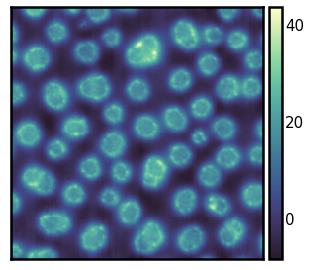

In [4]:
ax = isns.imgplot(pol, describe=False)

## Add a scalebar

So far our image doesn't tell us anything about the physical feature size in our polymer image. The easiest way to achieve this is by adding a scalebar to the image. 

In `imgplot()`, we simply need to specify the size-per-pixel or `dx` and the `units` to add a scalebar. Here, we know the size-per-pixel is 15 nm.

No. of Obs. : 65536
Min. Value : -8.2457214
Max. Value : 43.714034999999996
Mean : 7.456410761947062
Variance : 92.02680396572863
Skewness : 0.47745180538933696


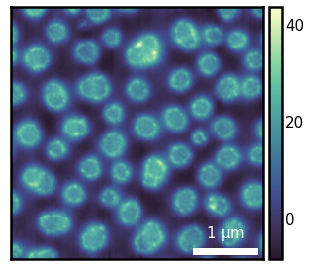

In [5]:
ax = isns.imgplot(pol, dx=15, units="nm")

## Modify colorbar properties

### Add colorbar label
We can add a colorbar label by specifying `cbar_label` parameter in the `imgplot()` function.

No. of Obs. : 65536
Min. Value : -8.2457214
Max. Value : 43.714034999999996
Mean : 7.456410761947062
Variance : 92.02680396572863
Skewness : 0.47745180538933696


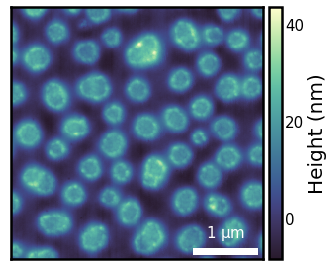

In [13]:
scale = {"dx" : 15, "units" : "nm"}

ax = isns.imgplot(pol, cbar_label="Height (nm)", **scale)

### Change colorbar ticks
We can modify colorbar ticks by specifying them as `cbar_ticks` parameter.

No. of Obs. : 65536
Min. Value : -8.2457214
Max. Value : 43.714034999999996
Mean : 7.456410761947062
Variance : 92.02680396572863
Skewness : 0.47745180538933696


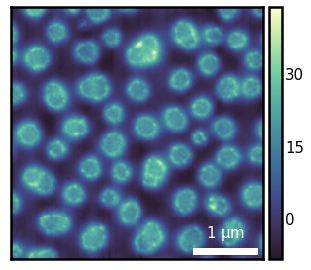

In [14]:
ax = isns.imgplot(pol, cbar_ticks=[0, 15, 30], **scale)

### Change colorbar orientation
By specifying the `orientation` parameter as 'h'/'horizontal' or 'v'/'vertical', we can change the colorbar orientation

No. of Obs. : 65536
Min. Value : -8.2457214
Max. Value : 43.714034999999996
Mean : 7.456410761947062
Variance : 92.02680396572863
Skewness : 0.47745180538933696


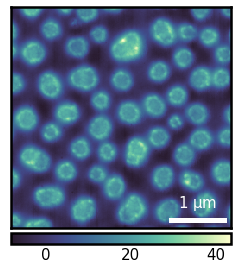

In [15]:
ax = isns.imgplot(pol, orientation="h", **scale)

### Log scale colorbar and colormap

In `imgplot()`, we can easily change the colormap and colorbar to log scale setting `cbar_log=True`.

Note: Since `imgplot()` is an axes-level function, it can be used to plot on an already existing `matplotlib` figure.

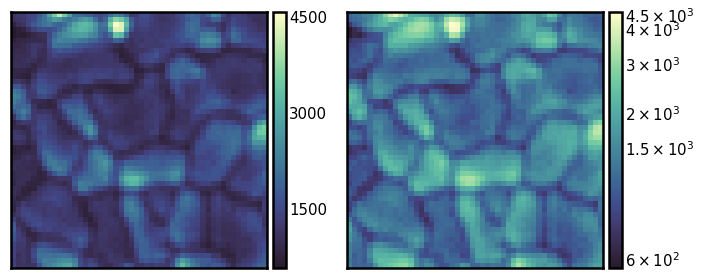

In [21]:
import matplotlib.pyplot as plt

pl = isns.load_image("fluorescence")

f, axes = plt.subplots(figsize=(10,5), nrows=1, ncols=2)

ax0 = isns.imgplot(pl, ax=axes[0], describe=False) 
ax1 = isns.imgplot(pl, ax=axes[1], cbar_log=True, describe=False)

Alternatively, you can also use the `norm` parameter to scale the data.

No. of Obs. : 2500
Min. Value : 553.0
Max. Value : 4563.0
Mean : 1416.3596
Variance : 229516.60012789114
Skewness : 1.7031223568307923


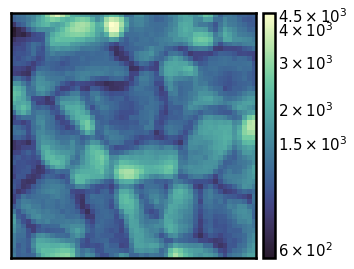

In [18]:
import matplotlib.colors as colors

ax = isns.imgplot(pl, norm=colors.LogNorm())

### Hide colorbar
We can hide the colorbar by setting `cbar=False`

No. of Obs. : 65536
Min. Value : -8.2457214
Max. Value : 43.714034999999996
Mean : 7.456410761947062
Variance : 92.02680396572863
Skewness : 0.47745180538933696


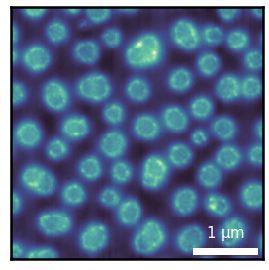

In [23]:
ax = isns.imgplot(pol, cbar=False, **scale)

## Modify colormaps

We can customize the look of our image by changing the colormap. All `matplotlib` colormaps can be used in addition to the colormaps that come with `seaborn-image`. Colormaps can be changed using the `cmap` parameter. 

Note : Whenever possible, the parameter names in `seaborn-image` functions are kept the same as in `matplotlib` functions. 

No. of Obs. : 65536
Min. Value : -8.2457214
Max. Value : 43.714034999999996
Mean : 7.456410761947062
Variance : 92.02680396572863
Skewness : 0.47745180538933696


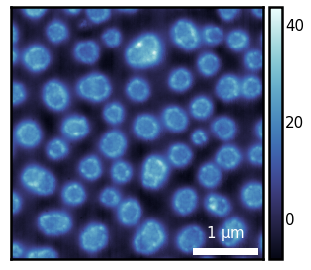

In [25]:
ax = isns.imgplot(pol, cmap="ice", **scale)

## Correct for outliers

Often, the data collected may not be perfect. Outlier data points can easily throw off the entire colormap during visualization. `imgplot()` provides an easy way to work with such data - by simply setting the `robust` parameter `True`. 

By default, `robust=True` plots the 2nd and the 98th percentile of the data. The percentiles can be further tuned using the `perc` parameter.

No. of Obs. : 65536
Min. Value : -8.2457214
Max. Value : 80.0
Mean : 7.4575748731332805
Variance : 92.10689001152696
Skewness : 0.48305630102204494
No. of Obs. : 65536
Min. Value : -8.2457214
Max. Value : 80.0
Mean : 7.4575748731332805
Variance : 92.10689001152696
Skewness : 0.48305630102204494


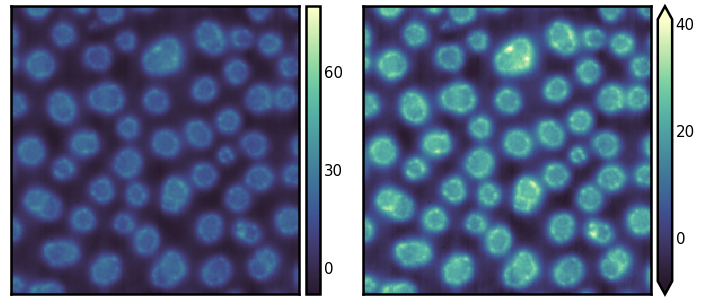

In [30]:
pol_out = isns.load_image("polymer outliers")

f, axes = plt.subplots(figsize=(10,5), nrows=1, ncols=2)

ax0 = isns.imgplot(pol_out, ax=axes[0]) 
ax1 = isns.imgplot(pol_out, robust=True, perc=(0,99.99), ax=axes[1])

The `robust` parameter recalculates the colormap range and appropriately extends the colorbar. We can further tune the `robust` beahvior and the colormap rescaling using the `vmin` and `vmax` paramter. By default, `imgplot()` prioritizes the `vmin` and the `vmax` parameter over the `robust` parameter.

No. of Obs. : 65536
Min. Value : -8.2457214
Max. Value : 80.0
Mean : 7.4575748731332805
Variance : 92.10689001152696
Skewness : 0.48305630102204494


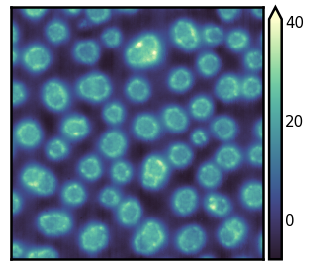

In [31]:
ax = isns.imgplot(pol_out, vmin=-8, robust=True, perc=(0,99.99))

Here, specifying the `vmin` parameter ignores the `robust` option for the lower value. `imgplot()` handles the colorbar extension accordingly. The same is true when `vmax` is specified. If both `vmin` and `vmax` are specified, `robust` parameter is completely ignored.

## Despine image axes

We can despine the image and the colorbar axes by setting the `despine` parameter `True`.

No. of Obs. : 65536
Min. Value : -8.2457214
Max. Value : 43.714034999999996
Mean : 7.456410761947062
Variance : 92.02680396572863
Skewness : 0.47745180538933696


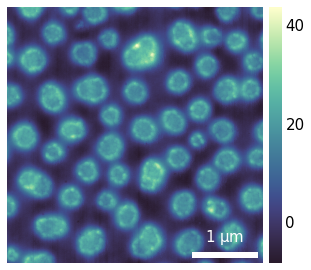

In [24]:
ax = isns.imgplot(pol, despine=True, **scale)